## Take home assignment 2


In [1]:
# import dependencies
import cv2
import numpy as np
import matplotlib.pyplot as plt
from random import randrange


### Question 1

Consider an image with 2 objects and a total of 3-pixel values (1 for each object and one for the background).  
Add Gaussian noise to the image. Implement and test Otsu’s algorithm with this image.

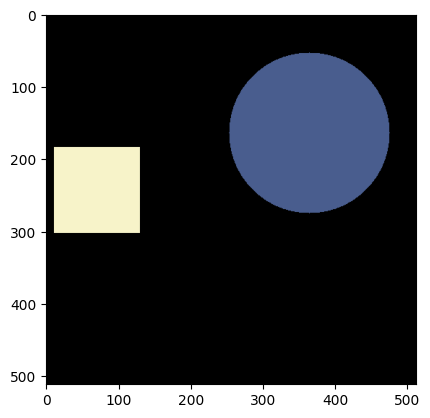

In [3]:
# generate an image with two objects
image_size = 512
image = np.zeros((image_size, image_size, 3), dtype=np.uint8)

def generate_random_color():
    return (randrange(256), randrange(256), randrange(256))

# draw a circle
circle_radius = (randrange(image_size // 10, image_size // 4))
circle_center = (randrange(circle_radius, image_size - circle_radius), 
                 randrange(circle_radius, image_size - circle_radius))
cv2.circle(image, circle_center, circle_radius, generate_random_color(), -1)

# draw a rectangle
rectangle_size = (randrange(image_size // 10, image_size // 4))
rectangle_center = (randrange(rectangle_size, image_size - rectangle_size), 
                    randrange(rectangle_size, image_size - rectangle_size))

# make sure the rectangle is not too close to the circle
while (
    abs(rectangle_center[0] - circle_center[0]) < circle_radius + rectangle_size) and (
    abs(rectangle_center[1] - circle_center[1]) < circle_radius + rectangle_size):

    rectangle_center = (randrange(rectangle_size, image_size - rectangle_size), 
                        randrange(rectangle_size, image_size - rectangle_size))

cv2.rectangle(image, 
              (rectangle_center[0] - rectangle_size, 
               rectangle_center[1] - rectangle_size), 
              (rectangle_center[0] + rectangle_size, 
               rectangle_center[1] + rectangle_size), 
              generate_random_color(), -1)

# show image
plt.imshow(image)

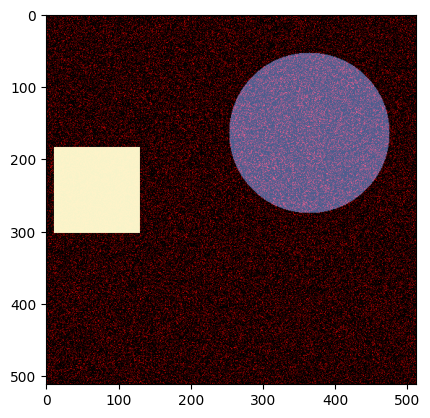

In [15]:
# Add Gaussian noise to the image
noise = np.zeros((image_size, image_size, 3), dtype=np.uint8)
cv2.randn(noise, 0, 100)
noisy_image = cv2.add(image, noise)

# show noisy image
plt.imshow(noisy_image)

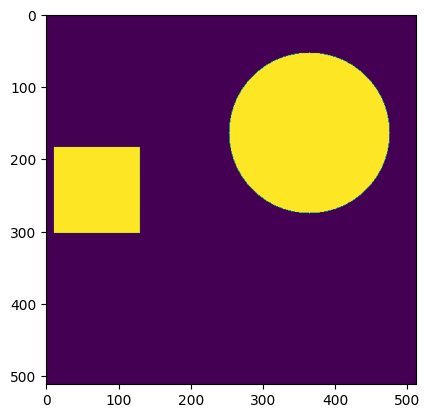

In [13]:
# Implement otsu thresholding
# convert image to grayscale
gray_image = cv2.cvtColor(noisy_image, cv2.COLOR_BGR2GRAY)
ret, otsu_threshold = cv2.threshold(gray_image, 
                                    0, 
                                    255, 
                                    cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# show otsu threshold
plt.imshow(otsu_threshold)

### Question 2

Implement a region-growing technique for image segmentation.  

In [4]:
img = cv2.imread('../assets/mri.jpeg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# create a mask to mark the selected pixels
mask = np.zeros_like(gray)

# seed points
seeds = [(255, 255)]

# color difference threshold
threshold = 10

In [5]:
# mark every seed point in mask as 1
for seed in seeds:
    mask[seed[0], seed[1]] = 1

In [6]:
# 4 connected neighbors
neighbors = [(0, 1), (0, -1), (1, 0), (-1, 0)]

for seed in seeds:
    for neighbor in neighbors:
        coord = {
            'x': seed[0] + neighbor[0],
            'y': seed[1] + neighbor[1]
        }

        # check if the neighbor is out of bounds
        if (coord['x'] < 0 or coord['x'] >= gray.shape[0]) or (
            coord['y'] < 0 or coord['y'] >= gray.shape[1]):
            continue

        # check if the neighbor is already marked
        if mask[coord['x'], coord['y']] != 0:
            continue

        # check if the neighbor is within the threshold
        if (gray[coord['x'], coord['y']] >= (gray[seed[0], seed[1]] - threshold)) and (
            gray[coord['x'], coord['y']] <= (gray[seed[0], seed[1]] + threshold)):
            
            mask[coord['x'], coord['y']] = 1
            seeds.append((coord['x'], coord['y']))

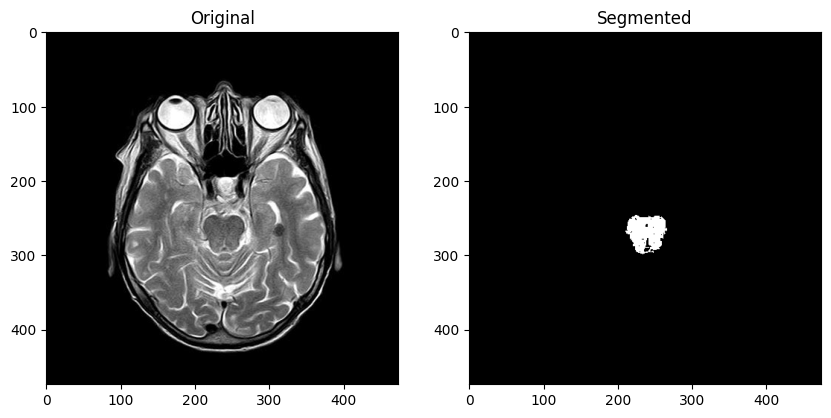

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(gray, cmap='gray')
ax[0].set_title('Original')

ax[1].imshow(mask, cmap='gray')
ax[1].set_title('Segmented')

plt.show()
